Задача:

Производственная система состоит из m станков,каждый из которых подвержен случайным поломкам.  Перед поломкой станок работает в течение промежутка времени, который представляет собой экспоненциально распределённую случайную величину со средним значением 8 часов.  Ремонтом станков занимается s ремонтников(где s — фиксированное положительное целое число). Для того, чтобы починить один станок, одному ремонтнику требуется экспоненциально распределенный промежуток времени со средним значением 2 часа; Ремонтом сломанного станка может заниматься только один ремонтник, даже если в это время есть другие свободные ремонтники. Если одновременно ломается более s станков, они формируют очередь на ремонт с дисциплиной FIFO и ждут первого свободного ремонтника.  Далее ремонтник чинит сломанный станок до тех пор, пока он не будет починен, независимо от того, что еще происходит в системе.  Предположим, что каждый час поломки одного станка стоит 50 долларов, а час работы ремонтника стоит 10 долларов.  (Ремонтникам платят почасовую оплату независимо от того, работают ли они на самом деле.) 

Предположим, что количество станков в системе равно m = 5, но напишите общий код, позволяющий учитывать значение m, достигающее 20, путем изменения входного параметра.

Смоделируйте систему ровно при 800 часах работы для каждой стратегии занятости ( s = 1, 2, 3, 4, 5 ) ,  чтобы определить, какая из них приводит к наименьшим ожидаемым средним затратам в час, допустив, что в момент времени 0 все машины только что были отремонтированы.

In [27]:
import numpy as np
from scipy.stats import expon


def simulate_system(m, s, hours):
    machine_working_time = expon.rvs(scale = 8, size = m)
    machine_breakdown_time = np.zeros(m)
    total_cost = 0

    for hour in range(hours):
        for i in range(m):
            if machine_breakdown_time[i] == 0:
                machine_working_time[i] -= 1
                if machine_working_time[i] <= 0:
                    machine_breakdown_time[i] = expon.rvs(scale = 8, size = 1)[0]
            else:
                machine_breakdown_time[i] -= 1
                if machine_breakdown_time[i] <= 0:
                    machine_breakdown_time[i] = 0
                    machine_working_time[i] = expon.rvs(scale = 8, size = 1)[0]
                    total_cost += 50

        repair_queue = 0
        for i in range(m):
            if machine_breakdown_time[i] > 0:
                repair_queue += 1

        while repair_queue > 0:
            repair_time = expon.rvs(scale = 2, size = 1)[0]
            total_cost += s * 10
            repair_queue -= s
            if repair_queue < 0:
                total_cost -= (abs(repair_queue) * 10)

    return total_cost / hours


m_values = range(5, 21, 1)
s_values = range (1, 6, 1)

for m in m_values:
    for s in s_values:
        avg_cost = simulate_system(m, s, 800)
        print( m, s, avg_cost)
        #print(f"Для кол-ва станков в системе m = {m} и кол-ва ремонтников s = {s}, ожидаемая средняя затрата в час: {avg_cost}) 

5 1 38.45
5 2 38.375
5 3 41.825
5 4 40.4125
5 5 39.825
6 1 45.9
6 2 47.2875
6 3 46.8
6 4 49.425
6 5 48.7125
7 1 55.3375
7 2 55.6375
7 3 56.5625
7 4 55.7625
7 5 51.65
8 1 64.9875
8 2 61.825
8 3 61.0125
8 4 60.9625
8 5 66.75
9 1 69.7375
9 2 72.1
9 3 69.2375
9 4 72.0875
9 5 70.075
10 1 76.5125
10 2 82.3875
10 3 76.525
10 4 78.525
10 5 78.9625
11 1 84.875
11 2 87.9125
11 3 84.1875
11 4 88.775
11 5 85.65
12 1 96.5125
12 2 98.0375
12 3 95.2625
12 4 91.525
12 5 92.3625
13 1 101.2125
13 2 102.2125
13 3 104.5875
13 4 104.9375
13 5 102.95
14 1 112.0
14 2 112.375
14 3 111.85
14 4 108.15
14 5 109.8375
15 1 119.7625
15 2 121.1125
15 3 122.2
15 4 122.55
15 5 118.1125
16 1 128.4875
16 2 125.375
16 3 123.275
16 4 125.4
16 5 123.75
17 1 133.3625
17 2 135.5125
17 3 131.425
17 4 132.25
17 5 137.6125
18 1 143.3875
18 2 140.1875
18 3 143.925
18 4 137.525
18 5 137.7375
19 1 146.4
19 2 151.925
19 3 154.125
19 4 152.4875
19 5 147.3625
20 1 159.3375
20 2 157.2
20 3 155.225
20 4 155.225
20 5 160.75


In [28]:
import pandas as pd
data = pd.read_csv('output_1.txt', sep = ' ', header = None)
data.columns = ['m', 's', 'avg_cost']
data

,m,s,avg_cost
0,5,1,40.8125
1,5,2,37.4250
2,5,3,40.6000
3,5,4,39.9500
4,5,5,37.5625
...,...,...,...
75,20,1,158.2125
76,20,2,157.2000
77,20,3,159.0250
78,20,4,159.4000


### Выясним, какая стратегия занятости (кол-во ремонтников в системе) нам будет наиболее выгодна, если в системе от 5 до 20 станков 

In [23]:
# для каждого m нам нужно оставить такое s , для которого avg_cost будет наименьшее 

# Можно сделать это с помощью метода groupby и функции idxmin в pandas
min_avg_cost_idx = data.groupby('m')['avg_cost'].idxmin() #нахождение индексов минимальных значений avg_cost для каждого m
new_data = data.loc[min_avg_cost_idx] #создание нового DataFrame на основе найденных индексов
new_data

,m,s,avg_cost
1,5,2,37.4250
7,6,3,45.3500
13,7,4,55.0375
19,8,5,62.2500
23,9,4,69.4750
29,10,5,76.4750
30,11,1,85.9500
36,12,2,92.1500
41,13,2,102.7125
48,14,4,107.0500


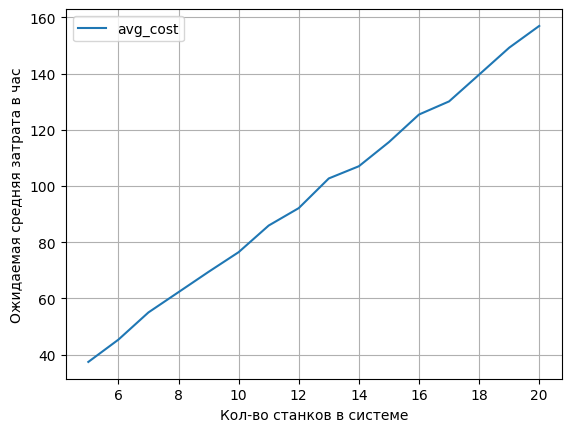

In [24]:
import matplotlib.pyplot as plt

new_data.plot(x = 'm', y = 'avg_cost')
plt.xlabel('Кол-во станков в системе')
plt.ylabel('Ожидаемая средняя затрата в час')
plt.grid(True)
plt.show()


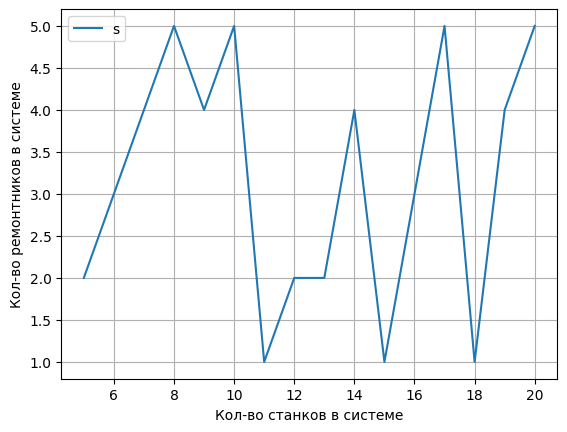

In [25]:
new_data.plot(x = 'm', y = 's')
plt.xlabel('Кол-во станков в системе')
plt.ylabel('Кол-во ремонтников в системе')
plt.grid(True)
plt.show()